### IMPORTING USEFULL LIBRARIES

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import statistics

### IMPORTING DATA

In [86]:
df = pd.read_csv(r'C:\Users\dines\OneDrive\Desktop\kaggle_data_set\heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [87]:
df.shape

(303, 14)

#### CHECKING WHEATHER THE DATA IS BALANCED OR UNBALANCED

In [88]:
df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

#### As you can see the ratio of labels is close to 1  which is far away from 0.1 . Hence the data is balanced

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [90]:
categorical_column = ['sex','cp','fbs','restecg','exng','slp','caa','thall']
continous_column = ['age','trtbps','chol','thalachh','oldpeak']

In [91]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### CORRELATION MATRIX

In [92]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


#### HEAT MAP

<AxesSubplot:>

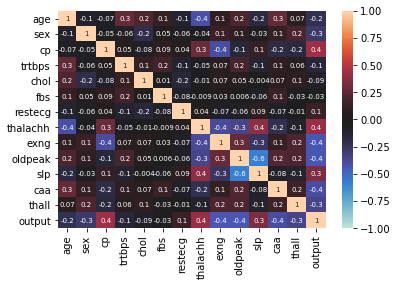

In [93]:
sns.heatmap(df.corr(),annot = True,fmt='.1g',vmin=-1, vmax=1, center= 0,annot_kws={'size': 7})

## PREPROCESSING DATA

#### FINDING NULL CELLS

In [94]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

#### SEARCHING FOR DUPLICATES

In [95]:
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


#### REMOVING DUPLICATES

In [96]:
df.drop_duplicates()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## DATA VISUALIZATION

#### BOX PLOT OF  CONTINOUS VARIABLES FOR DATA VISALIZATION

C:\Users\dines\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dines\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dines\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dines\anaconda3\lib\si

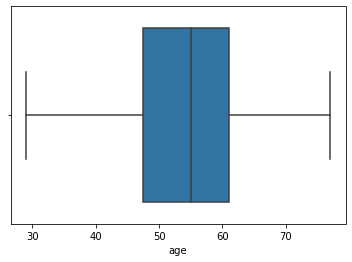

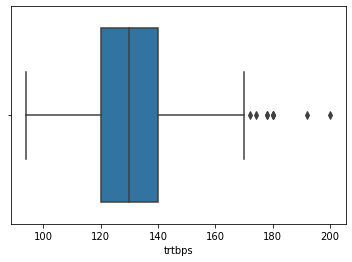

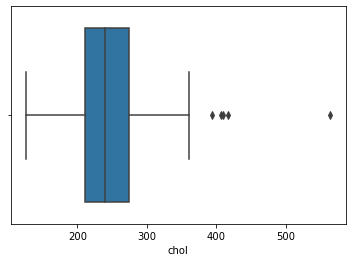

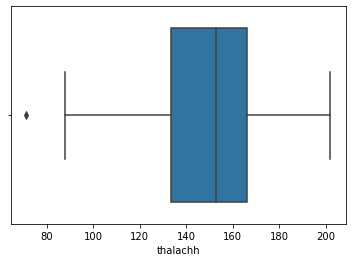

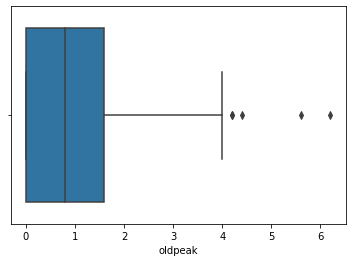

<Figure size 432x288 with 0 Axes>

In [97]:
for column in continous_column:
    sns.boxplot(df[column])
    plt.figure()

#### IDENTIFING OUTLIERS OF CONTINOUS VARIABLE  BY USIND BOXPLOT AND REMOVING THEM

In [98]:
df.loc[df['chol']>450,'chol']=np.mean(df['chol'])
df.loc[df['trtbps']>175,'trtbps']=np.mean(df['trtbps'])
df.loc[df['thalachh']<80,'thalachh']=np.mean(df['thalachh'])


#### PLOTTING DENSITY DISTRIBUTION OF CONTINOUS FEATURES

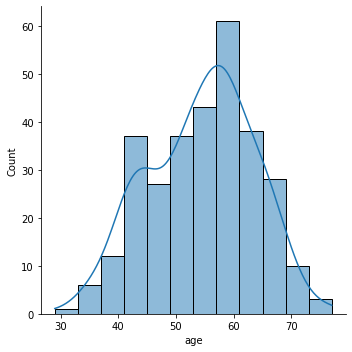

<Figure size 432x288 with 0 Axes>

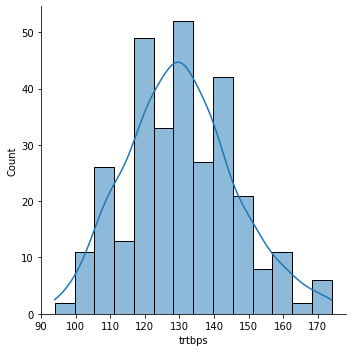

<Figure size 432x288 with 0 Axes>

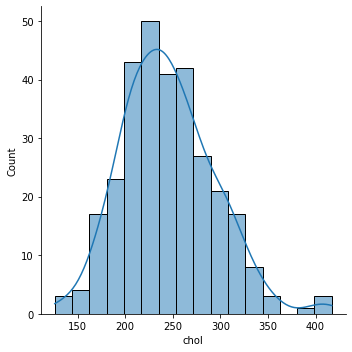

<Figure size 432x288 with 0 Axes>

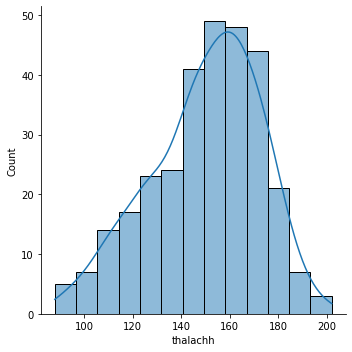

<Figure size 432x288 with 0 Axes>

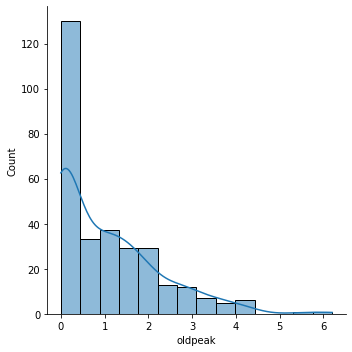

<Figure size 432x288 with 0 Axes>

In [99]:
for column in continous_column:
    sns.displot(df[column],kde = True)
    plt.figure()

#### DATA VISUALIZATION OF CATEGORICAL VARIABLES USING BOXPLOT

C:\Users\dines\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dines\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dines\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dines\anaconda3\lib\si

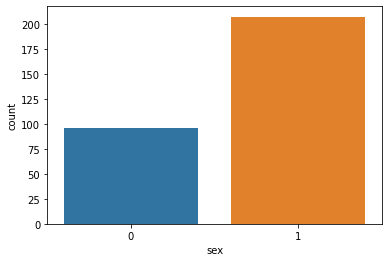

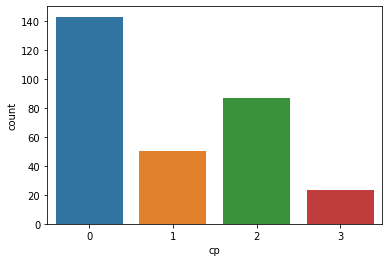

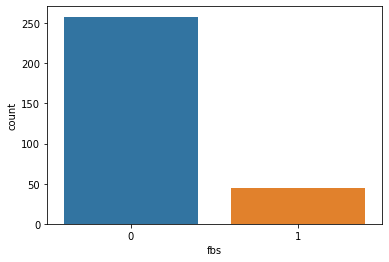

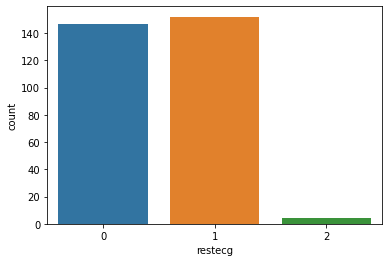

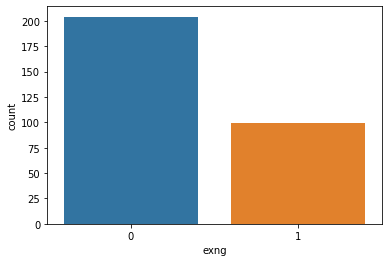

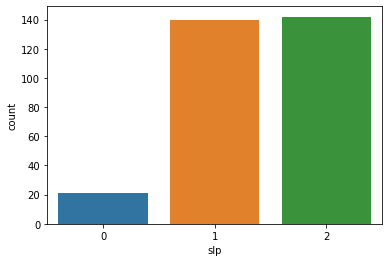

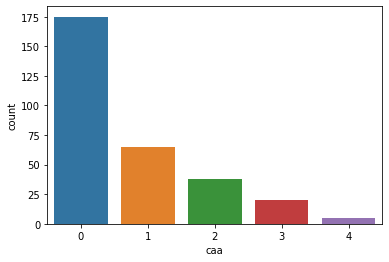

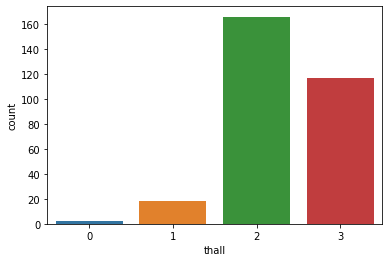

<Figure size 432x288 with 0 Axes>

In [100]:
for column in categorical_column:
    sns.countplot(df[column])
    plt.figure()

#### REMOVING NOISE FROOM THE DATA BY VISUALIZING CATEGORICAL DATA

In [101]:
df.loc[df['caa']==4,'caa']=statistics.mode(df['caa'])
df.loc[df['restecg']==2,'restecg']=statistics.mode(df['restecg'])

In [102]:
from sklearn.linear_model import LogisticRegression

In [103]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

#### SPLITTING DATA AS TRAIN AND TEST DATA

In [104]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 8)

#### Normalizing data

In [105]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Training the logistic regression on the training data

In [106]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

#### Evaluating the  r_square value of the train and test data set ...To evaluate the model ..and check for overfitting or underfitting

In [107]:
model.score(x_test,y_test)

0.8524590163934426

In [108]:
model.score(x_train,y_train)

0.8677685950413223

#### Importing DTC and randomizedsearchCV

In [109]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtc = DecisionTreeClassifier()
from sklearn.model_selection import RandomizedSearchCV

In [110]:
dtc

DecisionTreeClassifier()

### Setting Hyperparameters for DTC

In [111]:
param_grid = {
    'max_depth':[1,2,3,4,5,6],
    'min_samples_split':[1,2,4,5,6,7,3],
    'min_samples_leaf':[1,2,3],
    'criterion':['gini','entropy'],
    'max_features':['auto','sqrt','log2',None,0.2]
}

#### Training the model

In [112]:
dtc_grid = GridSearchCV(estimator=dtc,param_grid = param_grid,cv = 5,n_jobs=-1,verbose=1)

In [113]:
dtc_grid.fit(x_train,y_train)

Fitting 5 folds for each of 1260 candidates, totalling 6300 fits


C:\Users\dines\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.69812925 0.73588435 ... 0.70272109 0.73979592 0.70629252]
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2', None, 0.2],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 4, 5, 6, 7, 3]},
             verbose=1)

#### Getting the best hyper parameters that suits for the data

In [114]:
dtc_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 6}

#### Evaluating the model

In [115]:
dtc_grid.score(x_train,y_train)

0.8760330578512396

In [116]:
dtc_grid.score(x_test,y_test)

0.7049180327868853

#### Initializing the randomforestclassifier

In [117]:
from sklearn.ensemble import RandomForestClassifier
rfr = RandomForestClassifier()


In [118]:
rfr.fit(x_train,y_train)

RandomForestClassifier()

#### Evaluating the model

In [119]:
rfr.score(x_test,y_test)

0.8360655737704918

In [120]:
rfr.score(x_train,y_train)

1.0

#### As you can see the R_square vallue for the train data is 1 . this says that the model overfitted the data 

### Now lets set the Hyperparameters to eliminate overfitting

In [121]:
param_grid = {
    'n_estimators':[25,45,36,22,35,45,64,53],
    'max_features':['auto','sqrt','log2',0.2,None],
    'max_depth':[3,4,5,6],
    'min_samples_split':[4,5,6,3],
    'bootstrap':[True,False]
}

In [122]:
rfr_grid = GridSearchCV(estimator = rfr,param_grid = param_grid,cv = 5,n_jobs = -1)

In [123]:
rfr_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2', 0.2, None],
                         'min_samples_split': [4, 5, 6, 3],
                         'n_estimators': [25, 45, 36, 22, 35, 45, 64, 53]})

In [124]:
rfr_grid.best_params_

{'bootstrap': False,
 'max_depth': 3,
 'max_features': 'sqrt',
 'min_samples_split': 4,
 'n_estimators': 25}

In [125]:
rfr_grid.score(x_test,y_test)

0.8688524590163934

#### As you compare the model before and after setting hyperparameters . You can see that the model fits data well rather than over fitting

In [126]:
rfr_grid.score(x_train,y_train)

0.8884297520661157